In [317]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-e85c971c-bd87-b579-64b1-915d19799898)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

2.5.0


In [3]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [4]:
train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")

In [5]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [6]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [7]:
print("Are there missing values in train data: ", train.isnull().values.any()) 
print("Are there missing values in test data: ", test.isnull().values.any()) 

Are there missing values in train data:  True
Are there missing values in test data:  True


In [8]:
train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     1
PdDistrict    1
Resolution    1
Address       1
X             1
Y             1
dtype: int64

In [9]:
test.isnull().sum()

Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             1
Y             1
dtype: int64

In [10]:
train.dropna(inplace=True)
test.dropna(inplace=True)
test.isnull().sum()

Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64

In [11]:
output_class_labels=train['Category'].unique()
print("Total Training data:",train.shape[0])
print("Total features:",train.shape[1])
print("output_class_labels",output_class_labels)

Total Training data: 238389
Total features: 9
output_class_labels ['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']


In [12]:
train['Dates']=pd.to_datetime(train['Dates'])
test['Dates']=pd.to_datetime(test['Dates'])
train['Date']=train.iloc[:,0].apply(lambda x: x.day)
train['Month']=train.iloc[:,0].apply(lambda x: x.month)
train['Hour']=train.iloc[:,0].apply(lambda x: x.hour)
train['Year']=train.iloc[:,0].apply(lambda x: x.year)

test['Date']=test.iloc[:,1].apply(lambda x: x.day)
test['Month']=test.iloc[:,1].apply(lambda x: x.month)
test['Hour']=test.iloc[:,1].apply(lambda x: x.hour)
#test['Year']=train.iloc[:,0].apply(lambda x: x.year)

train.drop('Dates', axis=1, inplace=True)
test.drop('Dates', axis=1, inplace=True)

In [13]:
test.isnull().sum()

Id            0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
Date          0
Month         0
Hour          0
dtype: int64

In [14]:
## Count number of observations of crime for each PD District
train['PdDistrict'].value_counts()

SOUTHERN      45179
MISSION       31560
NORTHERN      28355
CENTRAL       25484
BAYVIEW       22931
INGLESIDE     20674
TENDERLOIN    19031
TARAVAL       17082
PARK          14723
RICHMOND      13370
Name: PdDistrict, dtype: int64

In [15]:
def crime_occurance(): 
    categories = train['Category']
    # count the number of occurances for each category
    occurances = Counter(categories)
    sorted_based_on_count = sorted(occurances.items(), key=lambda pair: pair[1], reverse=True)
    for key, value in sorted_based_on_count:
        print(key, value)
    return sorted_based_on_count
        
sorted_crimes_based_on_count = crime_occurance()
#Observation: The most committed crime in San Francisco is the LARCENY/THEFT. TREA is the least.

LARCENY/THEFT 58021
OTHER OFFENSES 31178
NON-CRIMINAL 30927
ASSAULT 20026
VANDALISM 11664
WARRANTS 10826
VEHICLE THEFT 10794
BURGLARY 9832
DRUG/NARCOTIC 9635
SUSPICIOUS OCC 8869
MISSING PERSON 7208
ROBBERY 6285
FRAUD 4479
SECONDARY CODES 3095
WEAPON LAWS 2463
TRESPASS 1945
STOLEN PROPERTY 1677
FORGERY/COUNTERFEITING 1402
SEX OFFENSES FORCIBLE 1276
DRUNKENNESS 1149
PROSTITUTION 900
DISORDERLY CONDUCT 748
KIDNAPPING 737
RECOVERED VEHICLE 667
DRIVING UNDER THE INFLUENCE 624
ARSON 409
RUNAWAY 398
LIQUOR LAWS 325
EMBEZZLEMENT 238
FAMILY OFFENSES 119
LOITERING 113
SUICIDE 99
BRIBERY 94
EXTORTION 52
BAD CHECKS 51
SEX OFFENSES NON FORCIBLE 32
GAMBLING 26
TREA 4
PORNOGRAPHY/OBSCENE MAT 2


In [16]:
print("Most common resolutions for each category in percentage\n")
for i in train.groupby(["Category"])["Resolution"]:
  print('\033[95m'+i[0]+'\033[0m')
  print(round(i[1].value_counts()[:3]/i[1].count()*100,1))
  print()

Most common resolutions for each category in percentage

ARSON
NONE                 76.8
ARREST, BOOKED       18.8
PSYCHOPATHIC CASE     1.5
Name: Resolution, dtype: float64

ASSAULT
NONE              55.9
ARREST, BOOKED    33.0
ARREST, CITED      4.2
Name: Resolution, dtype: float64

BAD CHECKS
NONE              86.3
ARREST, BOOKED    11.8
UNFOUNDED          2.0
Name: Resolution, dtype: float64

BRIBERY
ARREST, BOOKED                      57.4
NONE                                33.0
COMPLAINANT REFUSES TO PROSECUTE     3.2
Name: Resolution, dtype: float64

BURGLARY
NONE               81.0
ARREST, BOOKED     17.4
JUVENILE BOOKED     0.3
Name: Resolution, dtype: float64

DISORDERLY CONDUCT
NONE              36.8
ARREST, CITED     31.0
ARREST, BOOKED    29.3
Name: Resolution, dtype: float64

DRIVING UNDER THE INFLUENCE
ARREST, BOOKED    84.5
NONE               7.7
ARREST, CITED      7.5
Name: Resolution, dtype: float64

DRUG/NARCOTIC
ARREST, BOOKED    80.4
NONE              10.6
ARREST,

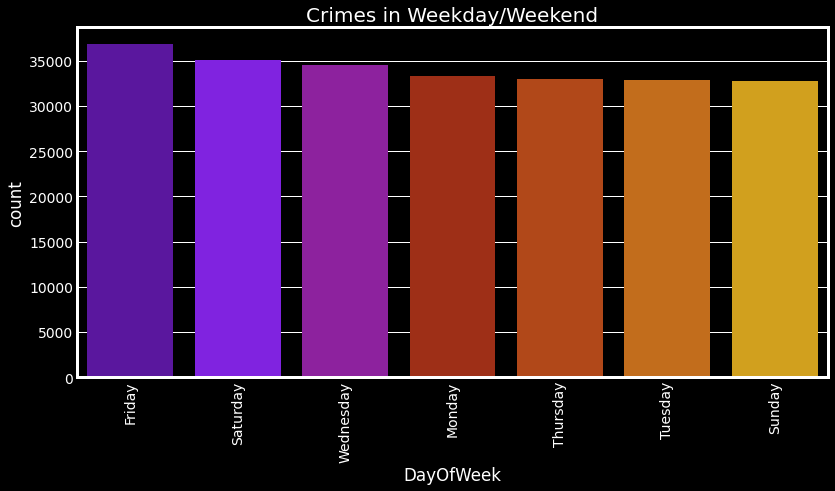

<Figure size 864x432 with 0 Axes>

In [17]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

sns.countplot(train['DayOfWeek'], palette = 'gnuplot',order = train['DayOfWeek'].value_counts().index)
#sns.countplot(train['WeekDay'])
plt.title('Crimes in Weekday/Weekend', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Class/Crimes_in_weekday.png', dpi=300, format='png', bbox_inches='tight') 

In [18]:
train['DayOfWeek'].replace(to_replace = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], value = [i for i in range(7)],inplace=True)
test['DayOfWeek'].replace(to_replace = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], value = [i for i in range(7)],inplace=True)

In [19]:
train['WeekDay']=train["DayOfWeek"].apply(lambda x:1 if x<5 else 0)

In [20]:
train['Block'] = train['Address'].str.contains('block', case=False)
train['Block'] = train['Block'].map(lambda x: 1 if  x == True else 0)

test['Block'] = test['Address'].str.contains('block', case=False)
test['Block'] = test['Block'].map(lambda x: 1 if  x == True else 0)



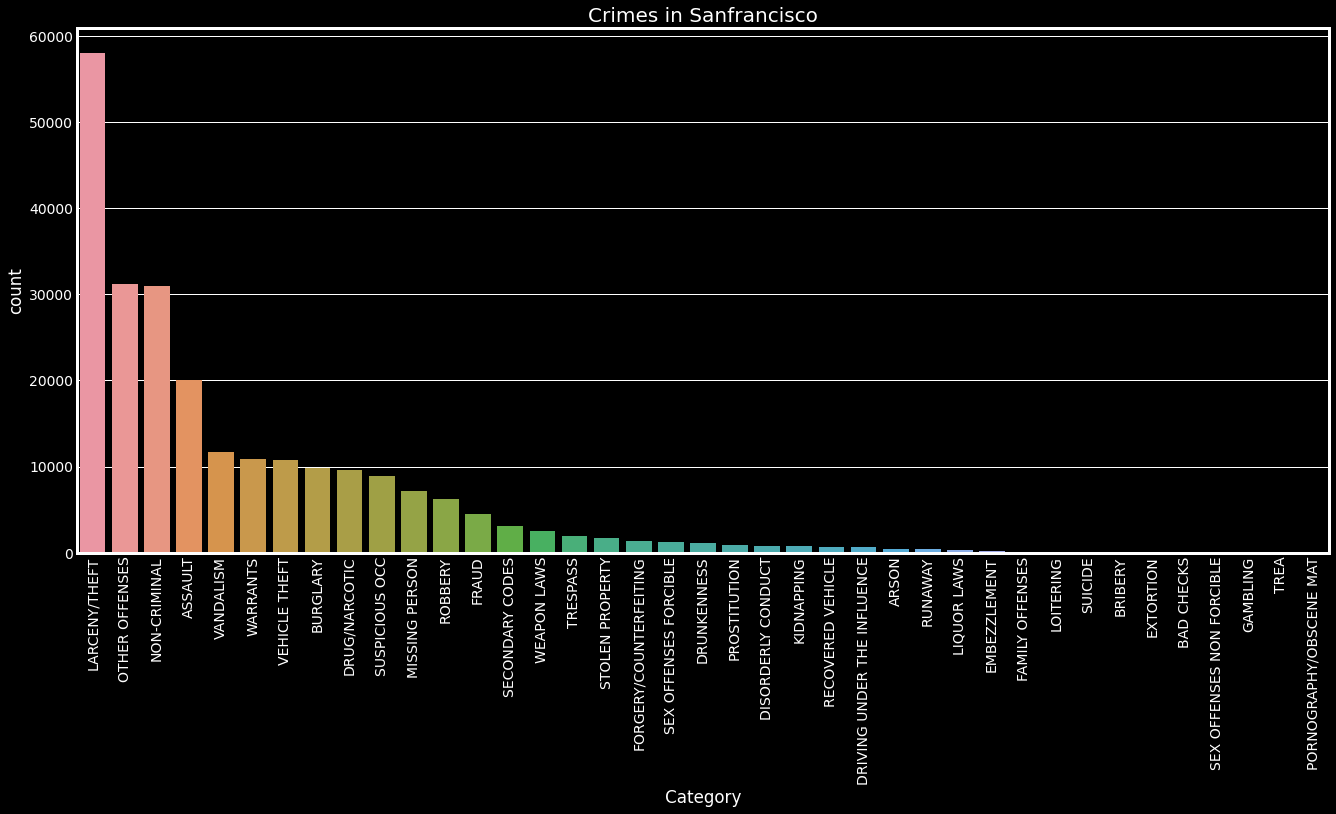

<Figure size 1440x648 with 0 Axes>

In [21]:
plt.rcParams['figure.figsize'] = (20, 9)
#plt.style.use('seaborn')
sns.countplot(train['Category'],order = train['Category'].value_counts().index)
plt.title('Crimes in Sanfrancisco', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Class/CrimesVsCategory.png', dpi=300, format='png', bbox_inches='tight') 

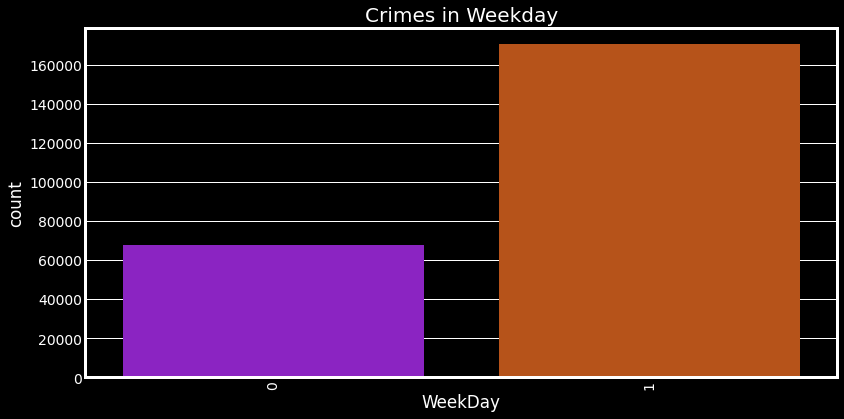

<Figure size 864x432 with 0 Axes>

In [22]:
plt.rcParams['figure.figsize'] = (12, 6)

#plt.style.use('fivethirtyeight')

sns.countplot(train['WeekDay'], palette = 'gnuplot')
#sns.countplot(train['WeekDay'])
plt.title('Crimes in Weekday', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Class/CrimesVsweekday.png', dpi=300, format='png', bbox_inches='tight') 

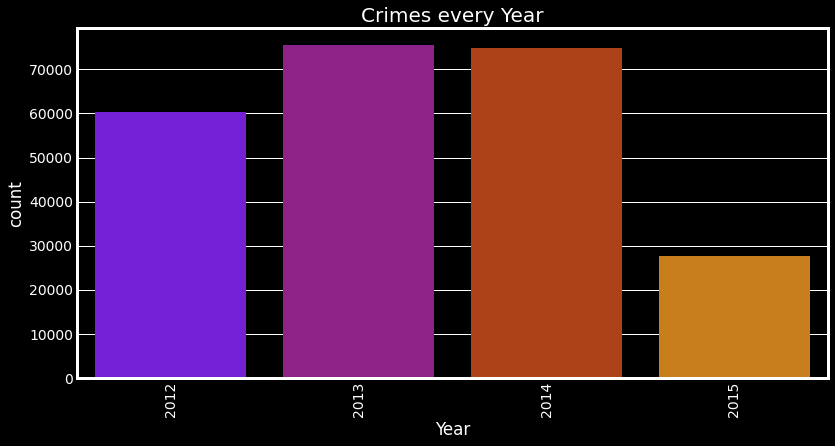

<Figure size 864x432 with 0 Axes>

In [23]:
plt.rcParams['figure.figsize'] = (12, 6)

#plt.style.use('fivethirtyeight')

sns.countplot(train['Year'], palette = 'gnuplot')
#sns.countplot(train['WeekDay'])
plt.title('Crimes every Year', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Class/CrimesVsYear.png', dpi=300, format='png', bbox_inches='tight') 

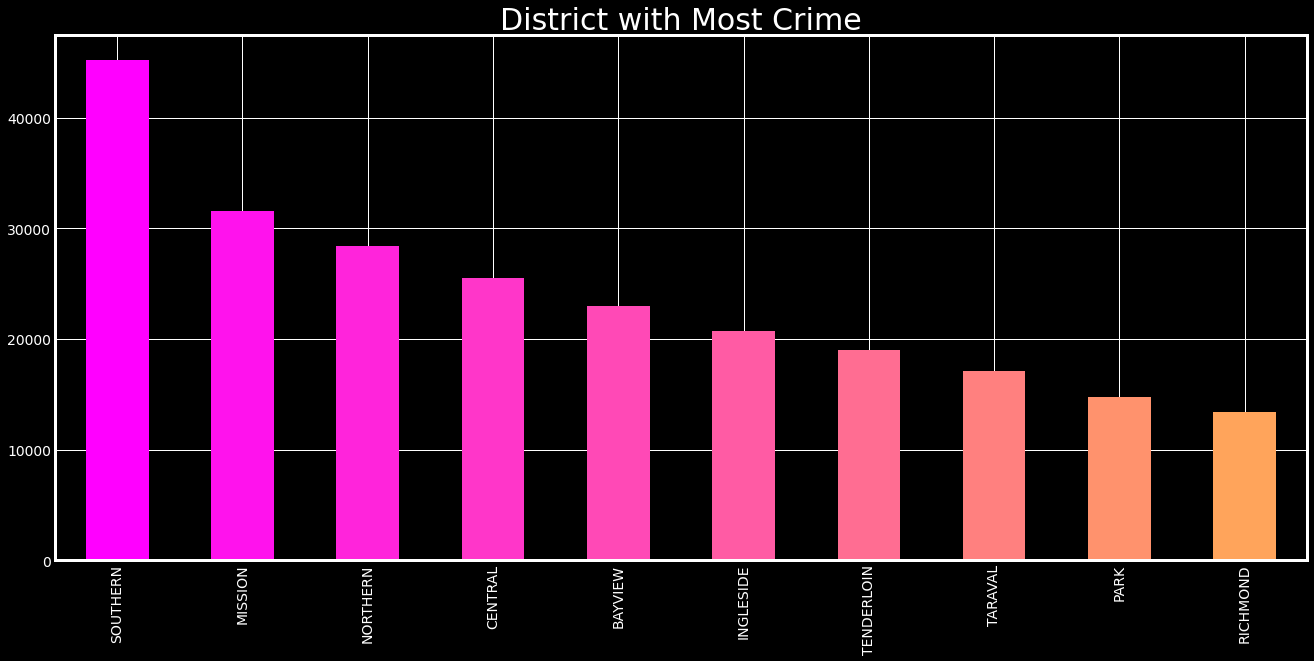

<Figure size 1440x648 with 0 Axes>

In [24]:
plt.rcParams['figure.figsize'] = (20, 9)
#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

color = plt.cm.spring(np.linspace(0, 1, 15))
train['PdDistrict'].value_counts().plot.bar(color = color)

plt.title('District with Most Crime',fontsize = 30)
plt.xticks(rotation = 90)
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Class/CrimesVsDistrict.png', dpi=300, format='png', bbox_inches='tight') 

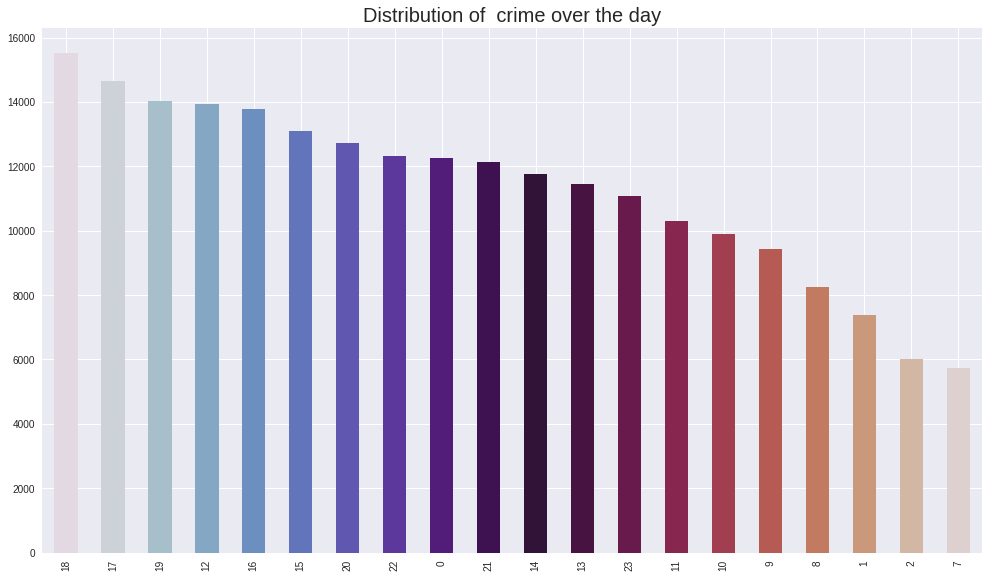

<Figure size 576x396 with 0 Axes>

In [25]:
color = plt.cm.twilight(np.linspace(0, 5, 100))
plt.style.use('seaborn')
train['Hour'].value_counts().head(20).plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of  crime over the day', fontsize = 20)
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Class/CrimesDistribution.png', dpi=300, format='png', bbox_inches='tight') 

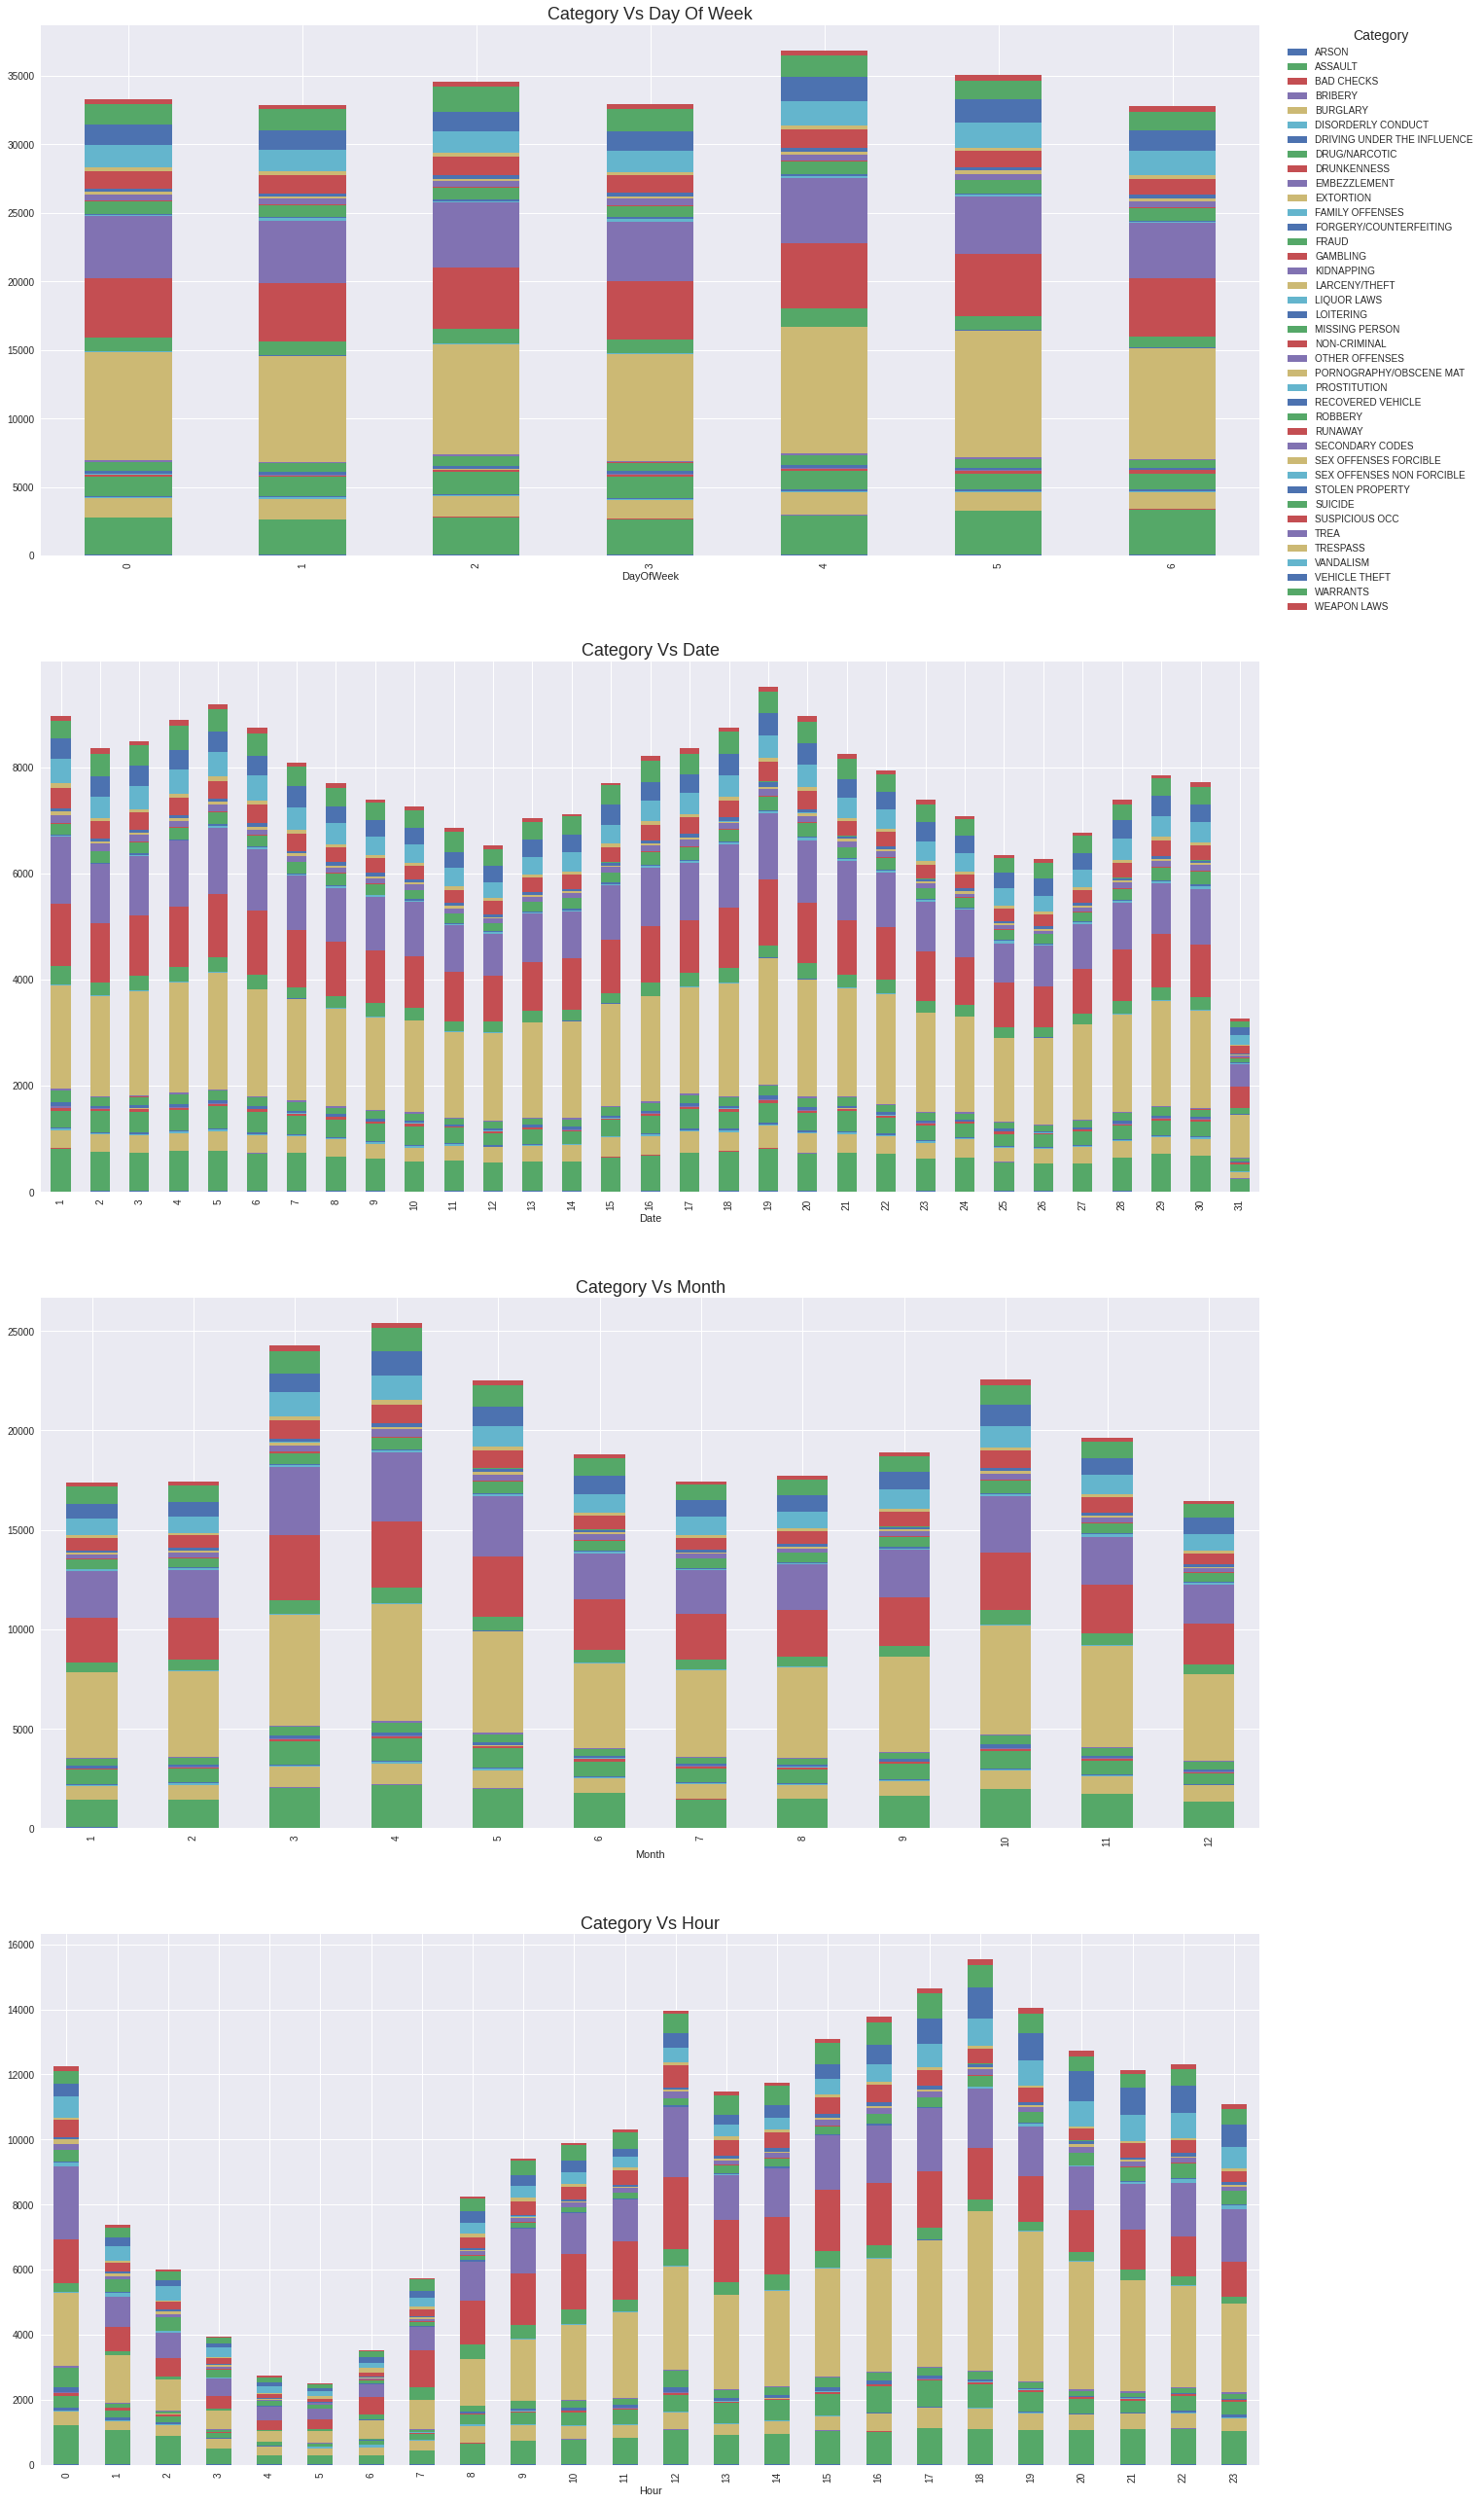

In [343]:
fig, ax= plt.subplots(nrows=4, ncols=1)
fig.set_size_inches(20, 43)
plt.style.use('seaborn')
tmp=pd.crosstab(train.DayOfWeek, train.Category).plot.bar(stacked=True, ax=ax[0])
ax[0].legend(title='Category', loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
ax[0].set_title("Category Vs Day Of Week", size=18)

tmp=pd.crosstab(train.Date, train.Category).plot.bar(stacked=True, ax=ax[1])
ax[1].legend([])
ax[1].set_title("Category Vs Date", size=18)

tmp=pd.crosstab(train.Month, train.Category).plot.bar(stacked=True, ax=ax[2])
ax[2].legend([])
ax[2].set_title("Category Vs Month", size=18)

tmp=pd.crosstab(train.Hour, train.Category).plot.bar(stacked=True, ax=ax[3])
ax[3].legend([])
ax[3].set_title("Category Vs Hour", size=18)
plt.style.use('dark_background')
plt.show()


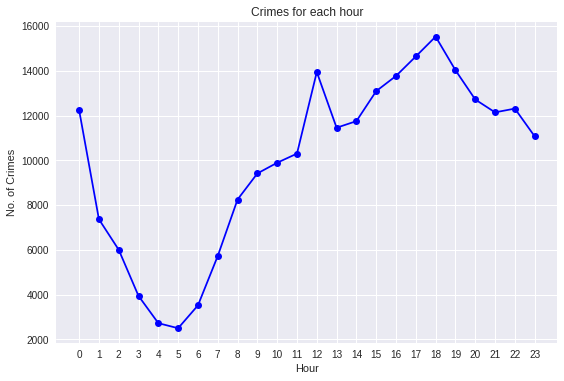

In [344]:
count_by_hours = train.groupby('Hour').size()
plt.style.use('seaborn')
plt.plot(count_by_hours.values, 'ro-', color = 'blue')

plt.xticks(count_by_hours.index)
plt.title('Crimes for each hour')
plt.ylabel ('No. of Crimes')
plt.xlabel ('Hour')
plt.show()

In [345]:
train.drop(["Address"],axis=1,inplace=True)
test.drop(['Address'], axis = 1,inplace=True)
#as these two columns are not in test data, we are dropping them
train.drop(['Descript','Resolution','Year'], axis = 1,inplace=True)

In [346]:

data = [train, test]

for dataset in data:
    le_district = LabelEncoder()
    le_district.fit(dataset['PdDistrict'].unique())
    print(list(le_district.classes_))
    dataset['PdDistrict']=le_district.transform(dataset['PdDistrict'])

print("after label encoding ",train['PdDistrict'].unique())
print("after label encoding ",test['PdDistrict'].unique())

['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']
['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']
after label encoding  [4 5 2 0 6 1 8 9 3 7]
after label encoding  [0 4 2 8 3 1 9 6 7 5]


In [347]:
le_category= LabelEncoder()
le_category.fit(train['Category'].unique())
print(list(le_category.classes_))
train['Category']=le_category.transform(train['Category'])
print("after label encoding ",train['Category'].unique())

['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY', 'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS']
after label encoding  [37 21 16 36 35 20 25  1 38  4 32  8 12  7 30 27 34 19 13 15 26  6 28 23
  5  0 11 17  3  9 31 18 29 10 14  2 33 24 22]


In [348]:
train['Y'].replace(to_replace= train['Y'].max() ,value=np.nan, inplace=True)
train['X'].replace(to_replace= train['X'].max() ,value=np.nan, inplace=True)
test['Y'].replace(to_replace= test['Y'].max() ,value=np.nan, inplace=True)
test['X'].replace(to_replace= test['X'].max() ,value=np.nan, inplace=True)

In [349]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238389 entries, 0 to 238388
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Category    238389 non-null  int64  
 1   DayOfWeek   238389 non-null  int64  
 2   PdDistrict  238389 non-null  int64  
 3   X           238385 non-null  float64
 4   Y           238386 non-null  float64
 5   Date        238389 non-null  int64  
 6   Month       238389 non-null  int64  
 7   Hour        238389 non-null  int64  
 8   WeekDay     238389 non-null  int64  
 9   Block       238389 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 30.0 MB


In [350]:
train=train.dropna()

In [351]:

X = train.drop("Category",axis=1)
Y = train["Category"]


In [352]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

[[0.33333333 0.44444444 0.59260117 ... 1.         1.         0.        ]
 [0.33333333 0.44444444 0.59260117 ... 1.         1.         0.        ]
 [0.33333333 0.44444444 0.60292456 ... 1.         1.         0.        ]
 ...
 [1.         0.33333333 0.50233373 ... 0.82608696 0.         0.        ]
 [1.         0.77777778 0.72132911 ... 0.7826087  0.         1.        ]
 [1.         1.         0.72455879 ... 0.7826087  0.         1.        ]]


In [353]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20, random_state=42)
    
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(190705, 9) (190705,)
(47677, 9) (47677,)


In [354]:
print(np.any(np.isnan(X_test)))
print(np.any(np.isnan(Y_test)))

False
False


In [355]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
# CV model
model = XGBClassifier()

[0.0415955  0.23068093 0.11737395 0.14160906 0.01585026 0.02215074
 0.12368521 0.         0.3070544 ]


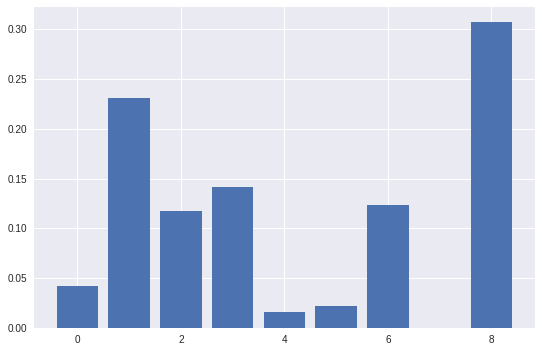

In [356]:
model.fit(X_train, Y_train)
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [357]:
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 28.39%


In [360]:
#selecting features based on the thresholdd
thresholds = sorted(model.feature_importances_)
for thresh in thresholds:
# select features using threshold
  selection = SelectFromModel(model, threshold=thresh, prefit=True)
  select_X_train = selection.transform(X_train)
  # train model
  selection_model = XGBClassifier()
  selection_model.fit(select_X_train, Y_train)
  # eval model
  select_X_test = selection.transform(X_test)
  predictions = selection_model.predict(select_X_test)
  accuracy = accuracy_score(Y_test, predictions)
  print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1],accuracy*100.0))

Thresh=0.000, n=9, Accuracy: 28.39%
Thresh=0.016, n=8, Accuracy: 28.39%
Thresh=0.022, n=7, Accuracy: 28.46%
Thresh=0.042, n=6, Accuracy: 28.55%
Thresh=0.117, n=5, Accuracy: 28.49%
Thresh=0.124, n=4, Accuracy: 28.10%
Thresh=0.142, n=3, Accuracy: 27.81%
Thresh=0.231, n=2, Accuracy: 25.28%
Thresh=0.307, n=1, Accuracy: 24.24%


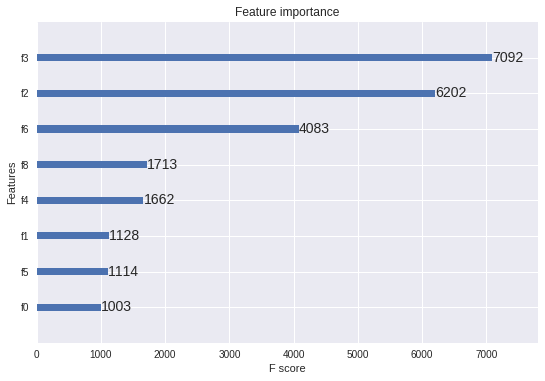

In [361]:
plot_importance(model)
plt.show()

In [362]:
tf.random.set_seed(42)

In [375]:
X = train.drop("Category",axis=1)
Y = train["Category"]
Y=pd.get_dummies(Y)
X = scaler.fit_transform(X)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20, random_state=42)
    
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(190705, 9) (190705, 39)
(47677, 9) (47677, 39)


In [376]:
def get_optimizer(name=None):
    if name is not None:
        if name.lower() == 'sgd':
            return tf.keras.optimizers.SGD(lr=0.01, decay=0.1, momentum=0.1, nesterov=False)
    # Use RMSProp by default
    return tf.keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08)

In [384]:

def base_model():
  model = keras.Sequential([
          layers.Dense(64, input_shape=(9,),activation="relu", name="layer1"),
          layers.Dense(128, activation="relu", name="layer2"),
          layers.Dropout(0.3),
          layers.Dense(256, activation="relu",name="layer3"),
          layers.Dense(128, activation="relu",name="layer4"),
          layers.Dropout(0.5),
          layers.Dense(64, activation="relu",name="layer5"),
          layers.Dense(39, activation="softmax")
      ])
  model.summary()
  model.compile(optimizer=get_optimizer('Adam'),loss = "categorical_crossentropy",metrics=['accuracy'])
  return model

In [380]:
early_stop = keras.callbacks.EarlyStopping(
  monitor='val_accuracy',
  mode="min",
  patience=10
)

In [381]:
# history=model.fit(X,Y,
#          batch_size=256,
#          epochs = 20,
#          verbose = 2,
#          callbacks=[callback],
#          validation_data=(X_test,Y_test))
model = base_model()
BATCH_SIZE = 32
history=model.fit(X,Y,
         batch_size=BATCH_SIZE,
         epochs = 100,
         verbose = 2,
         validation_data=(X_test,Y_test))

Epoch 1/100
3725/3725 - 14s - loss: 2.5697 - accuracy: 0.2428 - val_loss: 2.6423 - val_accuracy: 0.2424
Epoch 2/100
3725/3725 - 11s - loss: 2.5867 - accuracy: 0.2433 - val_loss: 2.5921 - val_accuracy: 0.2424
Epoch 3/100
3725/3725 - 11s - loss: 2.5899 - accuracy: 0.2434 - val_loss: 2.5912 - val_accuracy: 0.2424
Epoch 4/100
3725/3725 - 11s - loss: 2.5898 - accuracy: 0.2434 - val_loss: 2.5918 - val_accuracy: 0.2424
Epoch 5/100
3725/3725 - 11s - loss: 2.5891 - accuracy: 0.2434 - val_loss: 2.5902 - val_accuracy: 0.2424
Epoch 6/100
3725/3725 - 12s - loss: 2.5896 - accuracy: 0.2434 - val_loss: 2.5907 - val_accuracy: 0.2424
Epoch 7/100
3725/3725 - 11s - loss: 2.5898 - accuracy: 0.2434 - val_loss: 2.5916 - val_accuracy: 0.2424
Epoch 8/100
3725/3725 - 11s - loss: 2.5900 - accuracy: 0.2434 - val_loss: 2.5910 - val_accuracy: 0.2424
Epoch 9/100
3725/3725 - 11s - loss: 2.5899 - accuracy: 0.2434 - val_loss: 2.5927 - val_accuracy: 0.2424
Epoch 10/100
3725/3725 - 11s - loss: 2.5892 - accuracy: 0.2434 -

In [386]:
#with K-fold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
estimator = KerasClassifier(build_fn=base_model, epochs=100, batch_size=64, verbose=0)
kfold = KFold(n_splits=4, shuffle=True)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 64)                640       
_________________________________________________________________
layer2 (Dense)               (None, 128)               8320      
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)               0         
_________________________________________________________________
layer3 (Dense)               (None, 256)               33024     
_________________________________________________________________
layer4 (Dense)               (None, 128)               32896     
_________________________________________________________________
dropout_29 (Dropout)         (None, 128)               0         
_________________________________________________________________
layer5 (Dense)               (None, 64)              

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(title="Sequential_model")
#pd.DataFrame(non_seq_history.history).plot(title="Non_Sequential_model")

In [ ]:
score = model.evaluate(X,Y)